In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [3]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df['target_names'] = df.target.apply(lambda x : wine.target_names[x])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_names
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,class_2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
df.target.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

# Visualize distribution of each feature of each class

In [6]:
class_0 = df[df.target == 0]
class_1 = df[df.target == 1]
class_2 = df[df.target == 2]

In [7]:
list_features = df.columns.to_list()[:-2]
list_features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

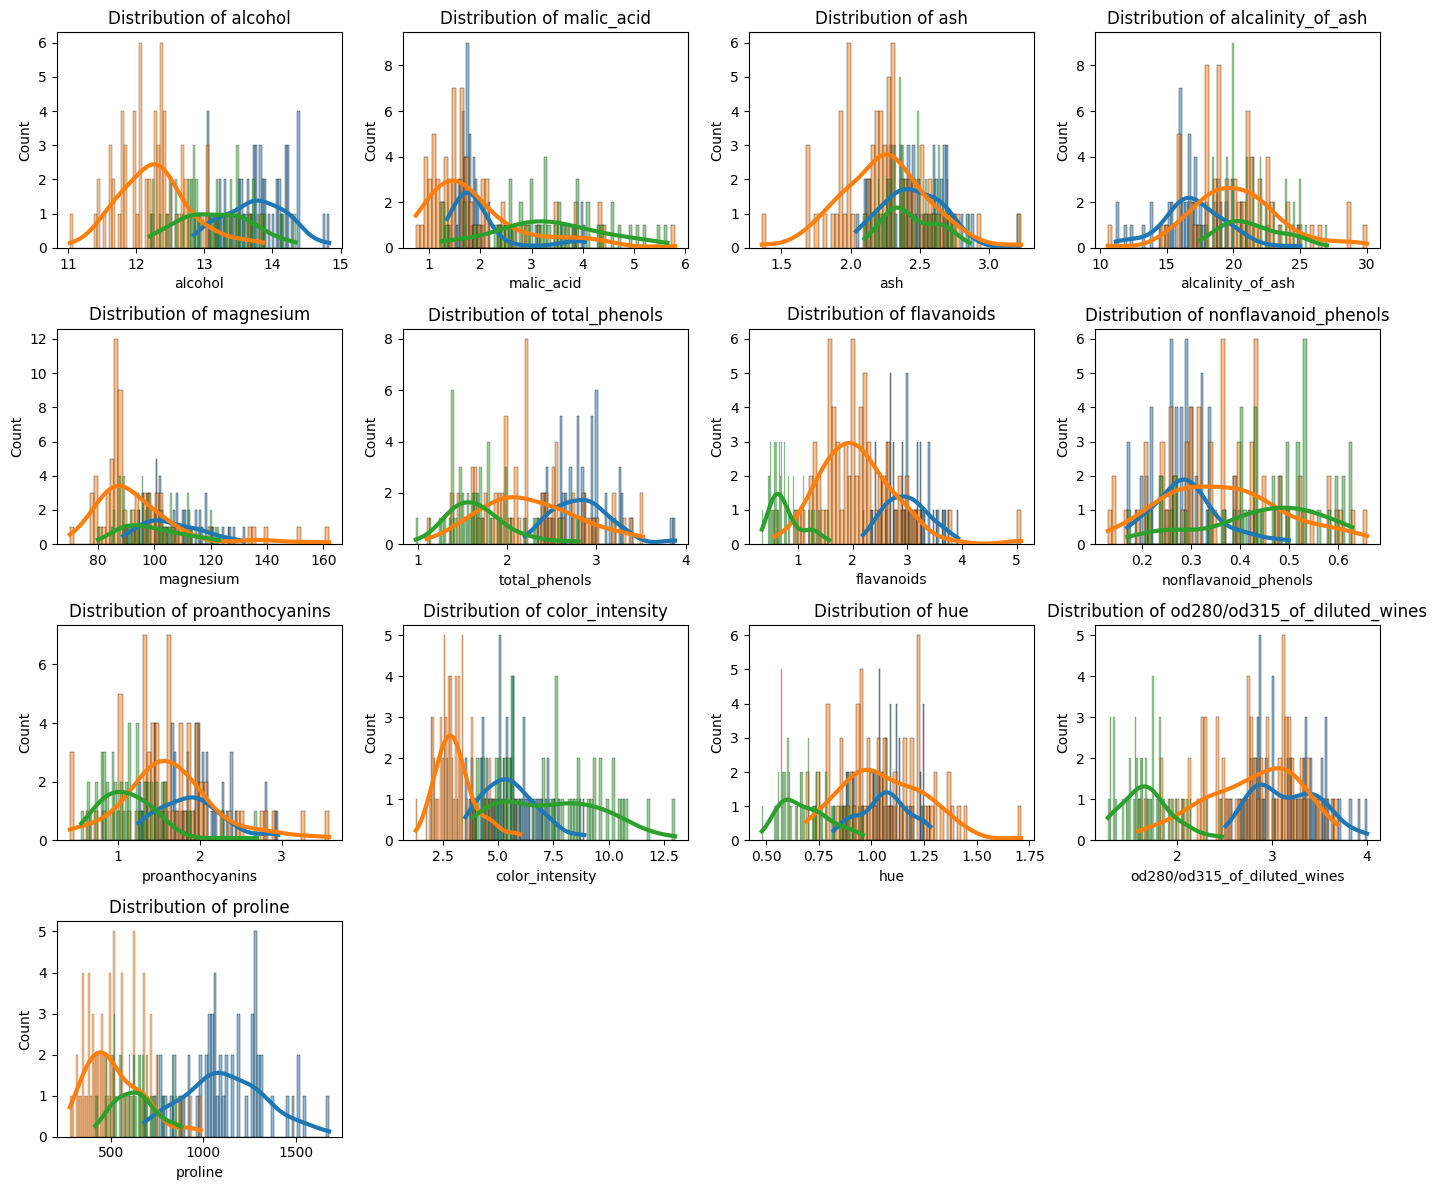

In [8]:
# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(14, 12))
axes = axes.flatten()

# Plot each feature in a subplot
for idx, col in enumerate(list_features):
    sns.histplot(class_0[col], bins=64, kde=True, line_kws={'linewidth': 3}, ax=axes[idx])
    sns.histplot(class_1[col], bins=64, kde=True, line_kws={'linewidth': 3}, ax=axes[idx])
    sns.histplot(class_2[col], bins=64, kde=True, line_kws={'linewidth': 3}, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')

# Remove any empty subplots
for remaining_idx in range(idx+1, len(axes)):
    fig.delaxes(axes[remaining_idx])

plt.tight_layout()
plt.show()

# Training using Gaussian Naive Bayes

In [9]:
X = wine.data
Y = wine.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, stratify=Y)
X_train.shape, X_test.shape, np.unique(Y_train, return_counts=True)

((124, 13), (54, 13), (array([0, 1, 2]), array([41, 50, 33], dtype=int64)))

In [10]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

gnb.score(X_train, Y_train), gnb.score(X_test, Y_test)

(0.9838709677419355, 1.0)

In [11]:
Yp_test = gnb.predict(X_test)

In [12]:
confusion_matrix(Y_test, Yp_test)

array([[18,  0,  0],
       [ 0, 21,  0],
       [ 0,  0, 15]], dtype=int64)

In [13]:
print(classification_report(Y_test, Yp_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

